In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\Nicolas Bolle\Documents\Code\Python\horsin-around


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.decisions import get_ranks, propose_merge, propose_reorg
from src.utilities import parse_float, flag_pareto_optimal, compute_energy, compute_centrality
#from src.visualizations import ...

In [3]:
# load test data, splitting into Zone 1 and Zone 2 data
file_path = 'data/test_horses_1.csv'
df = pd.read_csv(file_path)

df['health'] = df['health'].apply(parse_float)
df['speed'] = df['speed'].apply(parse_float)
df['jump'] = df['jump'].apply(parse_float)

df1 = df.query('zone == 1').copy()
df2 = df.query('zone == 2').copy()

df

,zone,name,health,speed,jump
0,1,A,0.80,0.80,0.80
1,1,B,0.81,0.81,0.79
2,1,C,0.80,0.82,0.78
3,1,D,0.80,0.83,0.77
4,1,E,0.80,0.84,0.76
5,1,F,0.80,0.85,0.75
6,1,G,0.80,0.86,0.74
7,1,H,0.80,0.87,0.73
8,1,I,0.80,0.79,0.81
9,1,J,0.80,0.78,0.82


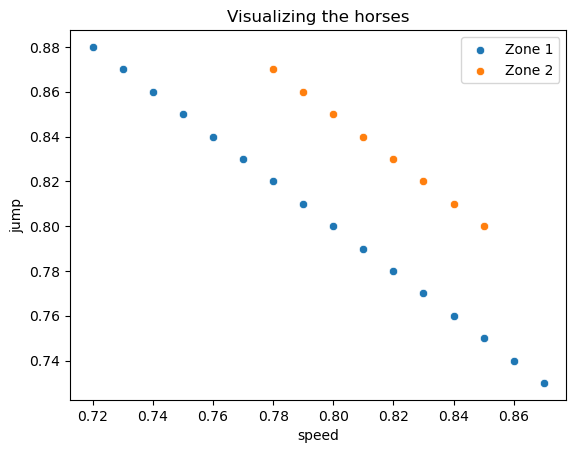

In [4]:
sns.scatterplot(df1, x='speed', y='jump', label='Zone 1')
sns.scatterplot(df2, x='speed', y='jump', label='Zone 2')
plt.legend()
plt.title('Visualizing the horses')
plt.show()

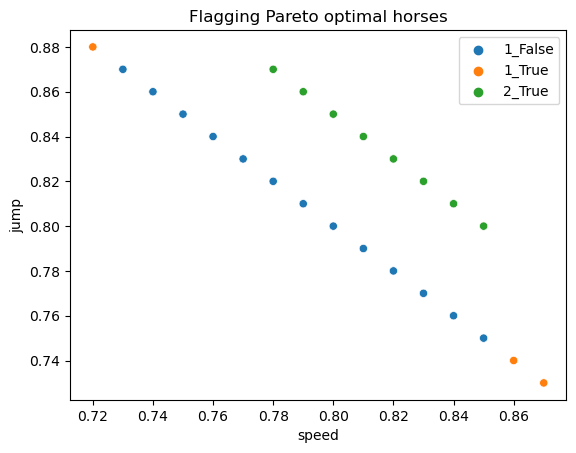

In [5]:
# demo of flagging Pareto optimal stuff correctly

# combining inputs
_df1 = df1.copy()
_df2 = df2.copy()
_df1['zone'] = 1
_df2['zone'] = 2
_df = pd.concat([_df1, _df2])

# flagging Pareto optimal points
_df['pareto_optimal'] = flag_pareto_optimal(_df[['speed', 'jump']])

# visualizing
_df['plot_label'] = _df['zone'].astype(str) + '_' + _df['pareto_optimal'].astype(str)
sns.scatterplot(_df, x='speed', y='jump', hue='plot_label')
plt.legend()
plt.title('Flagging Pareto optimal horses')
plt.show()

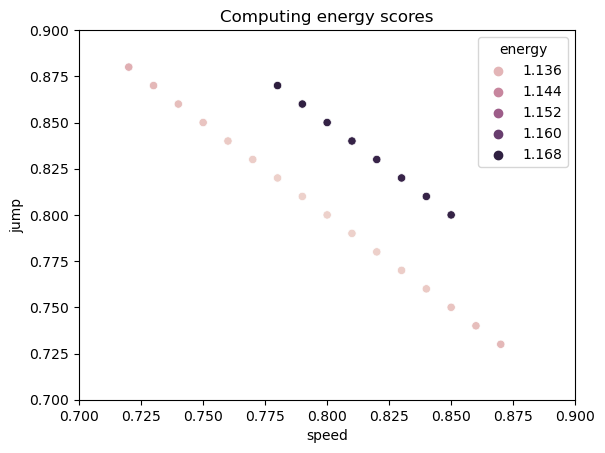

In [7]:
# demo of energy scores

# combining inputs
_df1 = df1.copy()
_df2 = df2.copy()
_df1['zone'] = 1
_df2['zone'] = 2
_df = pd.concat([_df1, _df2])

# compute centrality scores
_df['energy'] = _df[['speed', 'jump']].apply(compute_energy, axis=1)

sns.scatterplot(_df, x='speed', y='jump', hue='energy')
plt.xlim([0.7, 0.9])
plt.ylim([0.7, 0.9])
plt.title('Computing energy scores')
plt.show()

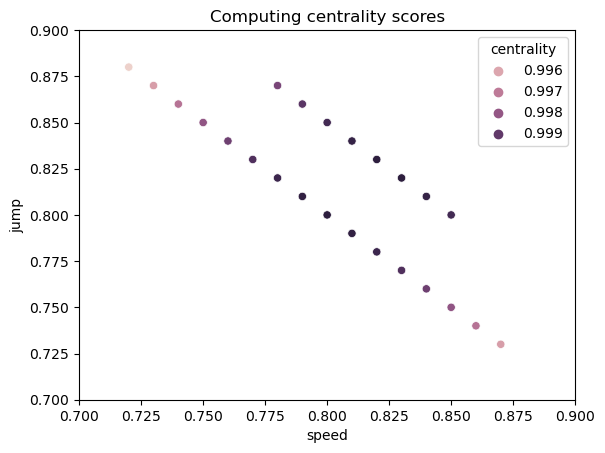

In [8]:
# demo of centrality scores

# combining inputs
_df1 = df1.copy()
_df2 = df2.copy()
_df1['zone'] = 1
_df2['zone'] = 2
_df = pd.concat([_df1, _df2])

# compute centrality scores
_df['centrality'] = _df[['speed', 'jump']].apply(compute_centrality, axis=1)

sns.scatterplot(_df, x='speed', y='jump', hue='centrality')
plt.xlim([0.7, 0.9])
plt.ylim([0.7, 0.9])
plt.title('Computing centrality scores')
plt.show()

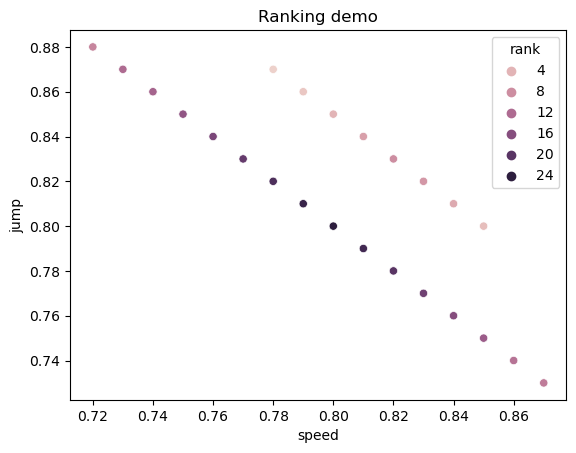

In [9]:
# ranking demo
df['rank'] = get_ranks(df[['speed', 'jump']], df[['health']])
sns.scatterplot(df, x='speed', y='jump', hue='rank')
plt.title('Ranking demo')
plt.show()

In [10]:
# generating merge instructions
df['rank'] = get_ranks(df[['speed', 'jump']], df[['health']])
s = propose_merge(df['name'], df['rank'], df['zone'])
print(s)

['Kill A and replace it with S', 'Kill B and replace it with T', 'Kill C and replace it with U', 'Kill D and replace it with V', 'Kill I and replace it with W', 'Kill J and replace it with X', 'Kill K and replace it with Y', 'Kill L and replace it with Z']


In [11]:
# generating reorg instructions
df1['rank'] = get_ranks(df1[['speed', 'jump']], df1[['health']])
s = propose_reorg(df1['name'], df1['rank'])
print(s)

['Move P to A', 'Move A to P', 'Move H to B', 'Move B to N', 'Move N to E', 'Move E to H', 'Move O to C', 'Move C to L', 'Move L to I', 'Move I to O', 'Move G to D', 'Move D to J', 'Move J to M', 'Move M to G']
